In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [7]:
df1 = pd.read_excel('drive/MyDrive/Fria/data2/ML_Sample1.xlsx')
df2 = pd.read_excel('drive/MyDrive/Fria/data2/ML_Sample2.xlsx')
df3 = pd.read_excel('drive/MyDrive/Fria/data2/ML_Sample3.xlsx')
df4 = pd.read_excel('drive/MyDrive/Fria/data2/ML_Sample4.xlsx')
frames = [df1, df2, df3,df4]
df = pd.concat(frames)


In [8]:
df.columns

Index(['Preprocessed-Frequency', 'Preprocesed-Energy', 'Non-processed-signal',
       'non-processed-frequency', 'non-processed-Energy',
       'Particle size-obtined by AE [um]',
       'Particle diameter obtained by microscope- [um]'],
      dtype='object')

In [9]:
#with processed data
X = np.array(df)[:,:2]
y = np.array(df)[:,5]
df2 = df.iloc[:,[0,1]]

#with non-processed data
#X = np.array(df)[:,2:5]
#y = np.array(df)[:,5]
#df2 = df.iloc[:,[2,3,4]]

In [10]:
np.corrcoef(np.array(df)[:,1],np.array(df)[:,2])

array([[1.       , 0.0058109],
       [0.0058109, 1.       ]])

In [11]:
from sklearn.model_selection import train_test_split
np.random.seed(1)
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

#print(x_train, x_val, x_test)

In [12]:
model = GradientBoostingRegressor(max_depth=100)
#model = LinearRegression()
#model = DecisionTreeRegressor()

#model = RandomForestRegressor( max_depth=100)
# evaluate the model
model.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=100)

(array([566., 519., 436.,  54.,  17.,   3.,   0.,   0.,   0.,   5.]),
 array([ 20.01196139,  79.94326904, 139.8745767 , 199.80588435,
        259.73719201, 319.66849966, 379.59980732, 439.53111497,
        499.46242262, 559.39373028, 619.32503793]),
 <BarContainer object of 10 artists>)

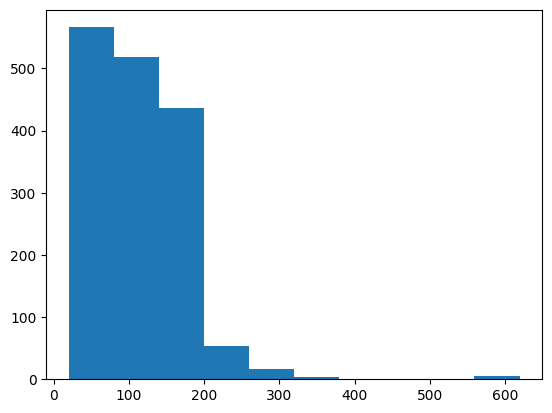

In [13]:
plt.hist(model.predict(x_test))

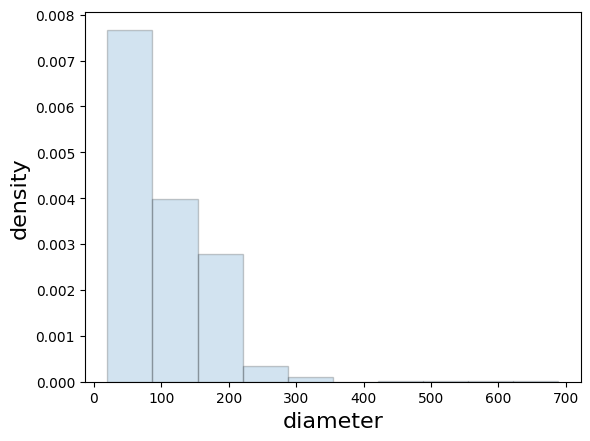

In [14]:
plt.hist(y_test,density=True,edgecolor = "black",alpha = 0.2)
plt.xlabel('diameter',fontsize = 16)
plt.ylabel('density',fontsize = 16)

plt.savefig('drive/MyDrive/Fria/hist_true.png', format='png', bbox_inches='tight')
#plt.savefig('drive/MyDrive/Fria/hist.png', format='png', bbox_inches='tight')

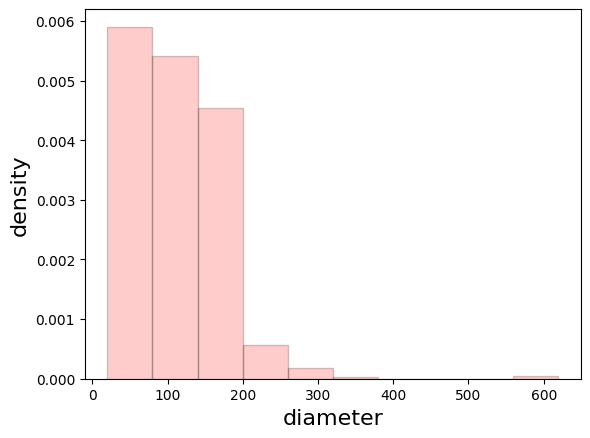

In [15]:
plt.hist(model.predict(x_test),density=True,color='red',edgecolor = "black",alpha = 0.2)
plt.xlabel('diameter',fontsize = 16)
plt.ylabel('density',fontsize = 16)

plt.savefig('drive/MyDrive/Fria/hist_predict.png', format='png', bbox_inches='tight')
#plt.savefig('drive/MyDrive/Fria/hist.png', format='png', bbox_inches='tight')

R2 0.9404468444533222


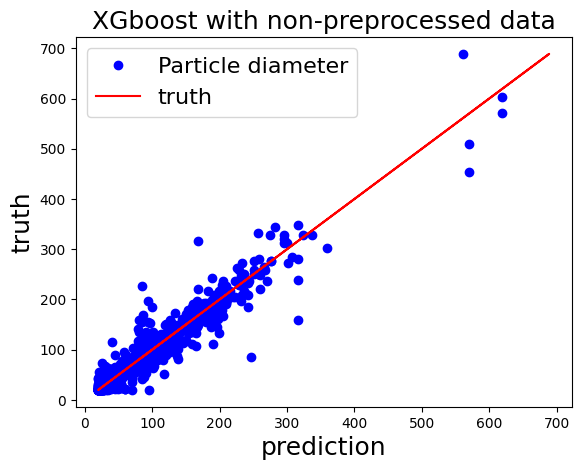

In [16]:
plt.plot(model.predict(x_test),y_test,'bo',label='Particle diameter')
plt.plot(y_test,y_test,'r',label ='truth')
plt.xlabel('prediction',fontsize = 18)
plt.ylabel('truth',fontsize = 18)
plt.title('XGboost with non-preprocessed data',fontsize = 18)
plt.legend(fontsize=16)


print('R2',r2_score(model.predict(x_test), y_test))

In [17]:
#print(mean_absolute_percentage_error(model.predict(x_test), y_test))
print('R2',r2_score(model.predict(x_test), y_test))

R2 0.9404468444533222


In [18]:
model.feature_importances_

array([0.01440283, 0.98559717])

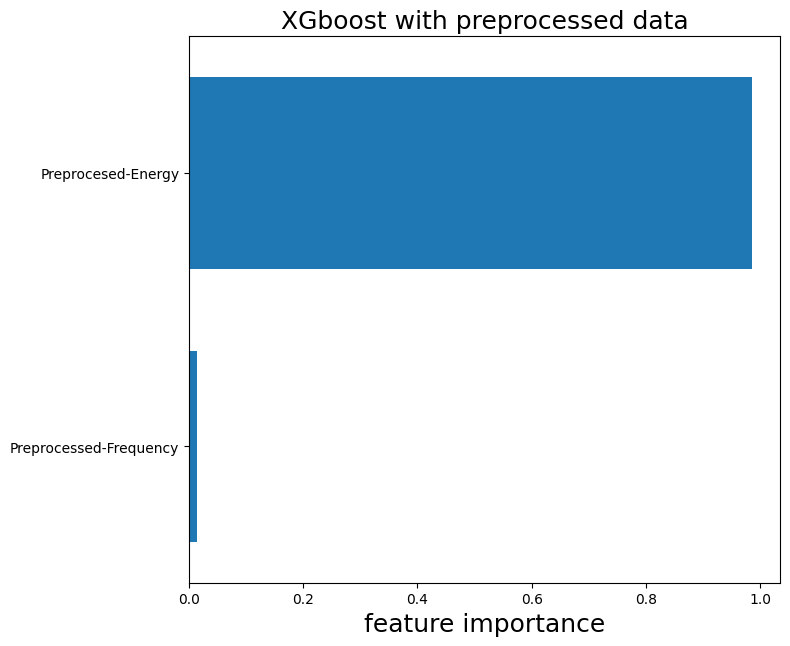

In [19]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, x_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(model.feature_importances_)
tree_indices = np.arange(0, len(model.feature_importances_)) + 0.5

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 6))  # Adjust the size as needed

# Assuming tree_indices, model.feature_importances_, and tree_importance_sorted_idx are defined as required
ax1.barh(tree_indices, model.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(df2.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(model.feature_importances_)))

fig.tight_layout()
plt.title('XGboost with preprocessed data',fontsize = 18)
plt.xlabel('feature importance',fontsize = 18)
plt.show()


In [20]:
result = permutation_importance(model, x_train, y_train)
perm_sorted_idx = result.importances_mean.argsort()